# Day 3 作業

## [作業目標]:
熟悉對 HSV 的操作、Histogram equalization,以及二值化的使用。

## [作業重點]:
1. 將 RGB 轉換為 HSV,分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization,並印出處理結果(處理完的圖
片和處理完的 Value)
3. 將 RGB 轉換為 Gray level,再進行單值二值化及自適應二值化



## 解題步驟

1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)
3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

## 先讀取並顯示圖片

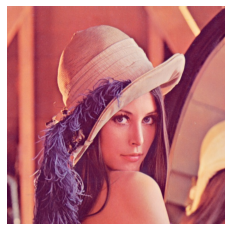

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

img = cv2.imread('data/lena.png')

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

## 1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value

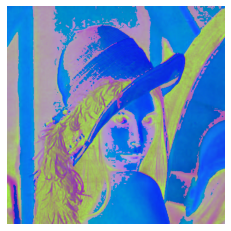

In [2]:
# 將 RGB 轉換為 HSV
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
plt.axis('off')
# 分別印出 Hue, Saturation, Value
title = ['Hue', 'Saturation', 'Value']
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
hue = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,0]
saturation = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,1]
value = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,2]

(-0.5, 1535.5, 511.5, -0.5)

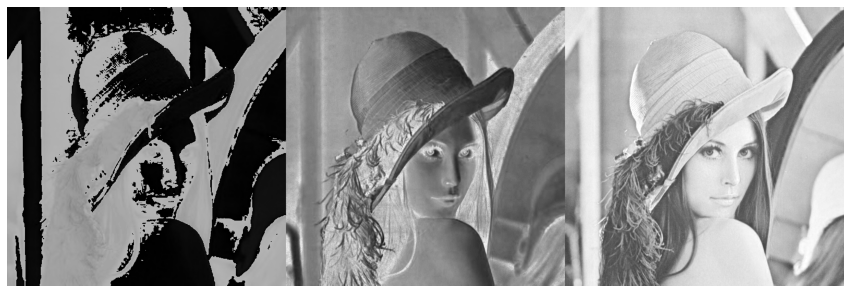

In [3]:
result = np.hstack([hue, saturation, value])
plt.figure(figsize=(15,10))
plt.imshow(result, 'gray')
plt.axis('off')

## 2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)

(-0.5, 1023.5, 511.5, -0.5)

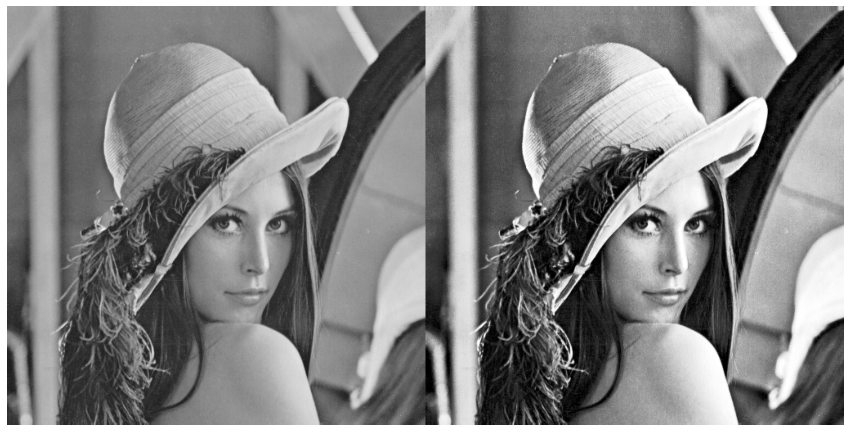

In [4]:
img = cv2.imread('data/lena.png',0)
equ = cv2.equalizeHist(img)
result = np.hstack((img,equ)) #stacking images side-by-side
plt.figure(figsize=(15,10))
plt.imshow(result, 'gray')
plt.axis('off')

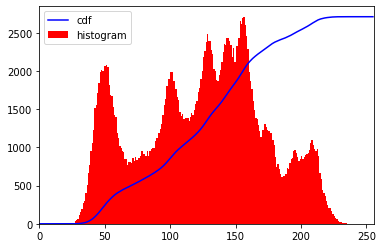

In [5]:
# before
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

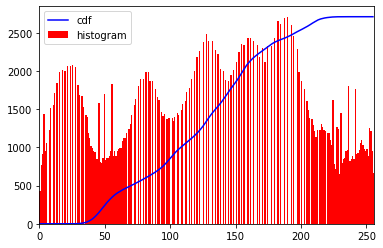

In [6]:
# after
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## 3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

(-0.5, 511.5, 511.5, -0.5)

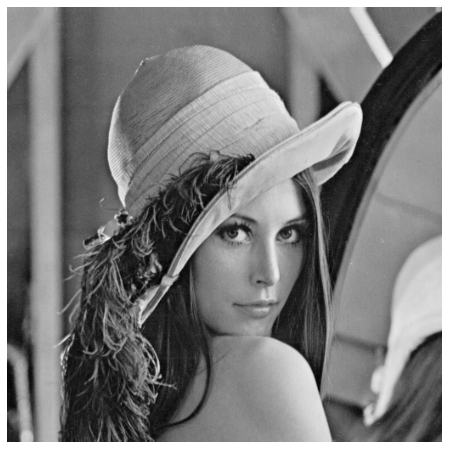

In [7]:
# 將圖片轉換為灰階圖片
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img = cv2.imread('data/lena.png',0)
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8,8))
plt.imshow(img, 'gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

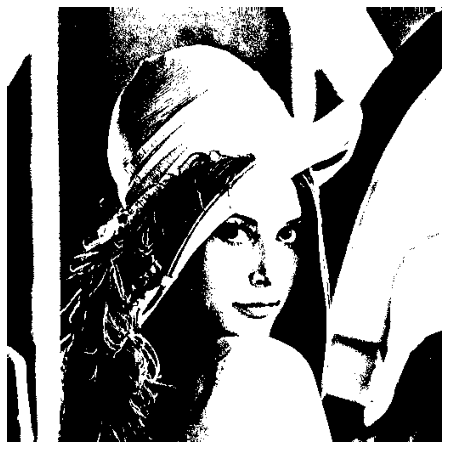

In [8]:
# Single Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img = cv2.imread('data/lena.png',0)
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8,8))
plt.imshow(th1, 'gray')
plt.axis('off')

(-0.5, 1023.5, 511.5, -0.5)

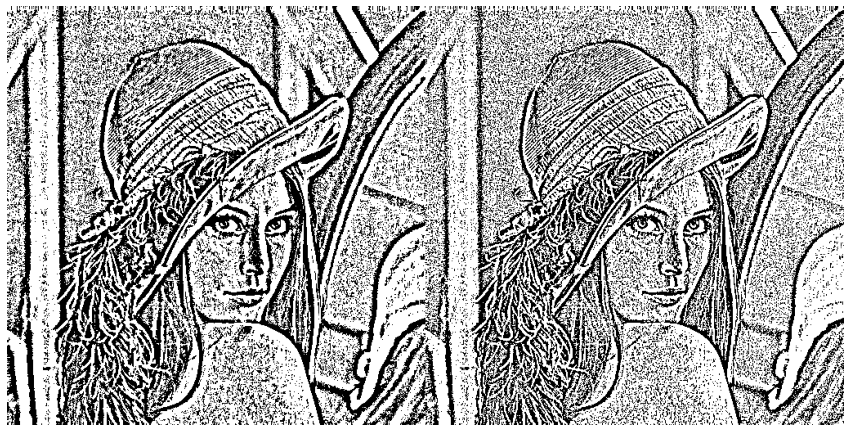

In [9]:
# Adaptive Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img = cv2.imread('data/lena.png',0)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
result = np.hstack((th2,th3))
plt.figure(figsize=(15,10))
plt.imshow(result, 'gray')
plt.axis('off')